In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import missingno as msno
#Classification Algorithm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

# Classification
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

training_data = 'adult.data.csv'
test_data = 'adult.test.csv'


In [2]:
columns = ['Age','Workclass','fnlgwt','Education','Education Num','Marital Status','Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
            'Hours/Week','Country','Above/Below 50K']
train=pd.read_csv(training_data, names=columns, delimiter =' *, *')
test=pd.read_csv(test_data, names=columns, delimiter =' *, *')

test = test.iloc[1:]#chose all rows from row 1.
print(train.head(3))#check whether attribute names are added 
print("=========================================")
print(test.head(3))

   Age         Workclass  fnlgwt  Education  Education Num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   

       Marital Status         Occupation   Relationship   Race   Sex  \
0       Never-married       Adm-clerical  Not-in-family  White  Male   
1  Married-civ-spouse    Exec-managerial        Husband  White  Male   
2            Divorced  Handlers-cleaners  Not-in-family  White  Male   

   Capital Gain  Capital Loss  Hours/Week        Country Above/Below 50K  
0          2174             0          40  United-States           <=50K  
1             0             0          13  United-States           <=50K  
2             0             0          40  United-States           <=50K  
   Age  Workclass  fnlgwt     Education  Education Num      Marital Status  \
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28

In [3]:
print(train.isnull().sum()) # Check missing values
print("=========================================")
print(test.isnull().sum()) # Check missing values

Age                0
Workclass          0
fnlgwt             0
Education          0
Education Num      0
Marital Status     0
Occupation         0
Relationship       0
Race               0
Sex                0
Capital Gain       0
Capital Loss       0
Hours/Week         0
Country            0
Above/Below 50K    0
dtype: int64
Age                0
Workclass          0
fnlgwt             0
Education          0
Education Num      0
Marital Status     0
Occupation         0
Relationship       0
Race               0
Sex                0
Capital Gain       0
Capital Loss       0
Hours/Week         0
Country            0
Above/Below 50K    0
dtype: int64


In [4]:
print(train.shape) 
print("=========================================")
print(test.shape) 

(32561, 15)
(16280, 15)


In [5]:
print(train.describe()) 
print("=========================================")
print(test.describe()) 

                Age        fnlgwt  Education Num  Capital Gain  Capital Loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

         Hours/Week  
count  32561.000000  
mean      40.437456  
std       12.347429  
min        1.000000  
25%       40.000000  
50%       40.000000  
75%       45.000000  
max       99.000000  
                Age        fnlgwt  Education Num  Capital Gain  Capital Loss  \
c

Age                   0
Workclass          1836
fnlgwt                0
Education             0
Education Num         0
Marital Status        0
Occupation         1843
Relationship          0
Race                  0
Sex                   0
Capital Gain          0
Capital Loss          0
Hours/Week            0
Country             583
Above/Below 50K       0
dtype: int64


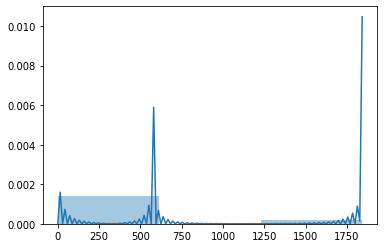

In [6]:
# seeing where the ? values are
print(train.isin(["?"]).sum())
sns.distplot(train.isin(["?"]).sum())

Age                  0
Workclass          963
fnlgwt               0
Education            0
Education Num        0
Marital Status       0
Occupation         966
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours/Week           0
Country            274
Above/Below 50K      0
dtype: int64


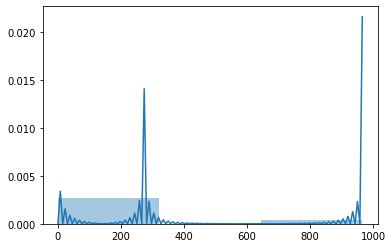

In [7]:
print(test.isin(["?"]).sum())
sns.distplot(test.isin(["?"]).sum())

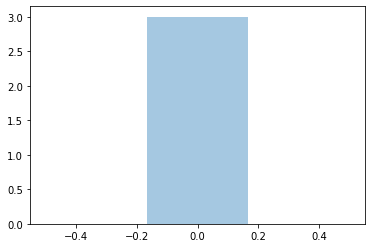

In [8]:
#replace ? with np.NaN
train = train.replace('?', np.nan)
train.dropna(how='any',inplace=True)
 
test = test.replace('?', np.nan)
test.dropna(how='any',inplace=True)
#check whether they has been changed
sns.distplot(test.isin(["?"]).sum())


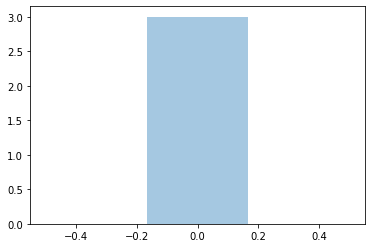

In [9]:
sns.distplot(train.isin(["?"]).sum())

In [10]:
# getting rid of the full stops
print(test.head(2))
test = test.replace("<=50K.", "<=50K")
test = test.replace(">50K.", ">50K")
print(test.head(2))

   Age  Workclass  fnlgwt   Education  Education Num      Marital Status  \
1   38    Private   89814     HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951  Assoc-acdm             12  Married-civ-spouse   

        Occupation Relationship   Race   Sex  Capital Gain  Capital Loss  \
1  Farming-fishing      Husband  White  Male             0             0   
2  Protective-serv      Husband  White  Male             0             0   

   Hours/Week        Country Above/Below 50K  
1          50  United-States          <=50K.  
2          40  United-States           >50K.  
   Age  Workclass  fnlgwt   Education  Education Num      Marital Status  \
1   38    Private   89814     HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951  Assoc-acdm             12  Married-civ-spouse   

        Occupation Relationship   Race   Sex  Capital Gain  Capital Loss  \
1  Farming-fishing      Husband  White  Male             0             0   
2  Protective-serv  

In [11]:
# dropping education as there is also a numerical column for this
train = train.drop('Education', 1)
test = test.drop('Education', 1)
train = train.drop('fnlgwt', 1)
test = test.drop('fnlgwt', 1)
print(train.shape) 
print("=========================================")
print(test.shape) 

(30162, 13)
(15059, 13)


In [12]:
# creating the dummy variables for train    
cat_vars = ['Workclass', 'Marital Status', 'Occupation', 'Relationship','Race', 'Sex', 'Country']

for var in cat_vars:
    cat_list = 'var' + '_' + var
    cat_list = pd.get_dummies(train[var], prefix = var)
    data1 = train.join(cat_list)
    train = data1
    
cat_vars = ['Workclass', 'Marital Status', 'Occupation', 'Relationship','Race', 'Sex', 'Country']
data_vars = train.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

train = train[to_keep]  
train['Above/Below 50K'] = LabelEncoder().fit_transform(train['Above/Below 50K'])

train.columns.values
print(train.head(2))

   Age  Education Num  Capital Gain  Capital Loss  Hours/Week  \
0   39             13          2174             0          40   
1   50             13             0             0          13   

   Above/Below 50K  Workclass_Federal-gov  Workclass_Local-gov  \
0                0                      0                    0   
1                0                      0                    0   

   Workclass_Private  Workclass_Self-emp-inc  ...  Country_Portugal  \
0                  0                       0  ...                 0   
1                  0                       0  ...                 0   

   Country_Puerto-Rico  Country_Scotland  Country_South  Country_Taiwan  \
0                    0                 0              0               0   
1                    0                 0              0               0   

   Country_Thailand  Country_Trinadad&Tobago  Country_United-States  \
0                 0                        0                      1   
1                 0    

In [13]:
# creating the dummy variables for test   
cat_vars = ['Workclass', 'Marital Status', 'Occupation', 'Relationship','Race', 'Sex', 'Country']

for var in cat_vars:
    cat_list = 'var' + '_' + var
    cat_list = pd.get_dummies(test[var], prefix = var)
    data1 = test.join(cat_list)
    test = data1
    
cat_vars = ['Workclass', 'Marital Status', 'Occupation', 'Relationship','Race', 'Sex', 'Country']
data_vars = test.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

test = test[to_keep]  
test['Above/Below 50K'] = LabelEncoder().fit_transform(test['Above/Below 50K'])

In [14]:
# seeing if the datasets are balanced
print(train['Above/Below 50K'].value_counts()[0]/train.shape[0])
print(train['Above/Below 50K'].value_counts()[1]/train.shape[0])

0.7510775147536636
0.24892248524633645


In [15]:
# they aren't balanced

# seeing if they have the same number of columns
print(test.shape)
print(train.shape)
# they don't so need to find out what that is

(15059, 87)
(30162, 88)


In [16]:
# checking to see which column is missing
missing_cols = set(train) - set(test)#compare train and test set
print(missing_cols)

{'Country_Holand-Netherlands'}


In [17]:
# # Adding in a column that was missing from the test set filled with 0's 
# test['Country_Holand-Netherlands'] = pd.Series(0, index = test.index)

# drop the missing column in training set
train.drop(['Country_Holand-Netherlands'] , axis=1 , inplace=True)# remove the first column

In [18]:
#check whether it was inserted
print(test.shape)
print(train.shape)

(15059, 87)
(30162, 87)


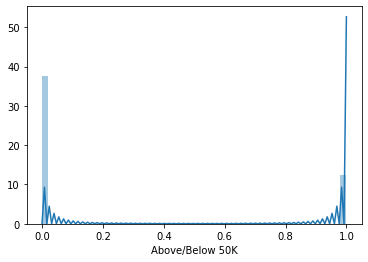

In [19]:
sns.distplot(train['Above/Below 50K'])

In [20]:
# making the training and test set 
X_train = train.drop(['Above/Below 50K'], axis = 1)
y_train = train['Above/Below 50K']
X_test = test.drop(['Above/Below 50K'], axis = 1)
y_test = test['Above/Below 50K']

In [21]:
# this method for print out Metrics
def printsMetrics(classifier, label):
    start_time = datetime.datetime.now()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    end_time = datetime.datetime.now()  # Track learning ending time
    exection_time = (end_time - start_time).total_seconds()  # Track execution time
    #Performance Metrics : 
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    roc_AUC = roc_auc_score(y_test, y_pred)
    #printout : 
    print("----------------------------------------")
    print("Classifier: " + label)
    print(label + ' Accuracy : %0.2f ' % acc)
    print(label + ' Precision Score : %0.2f ' %prec)
    print(label + ' F1 Score : %0.2f ' % F1)
    print(label + ' Recall Score : %0.2f ' %rec)
    print(label + ' roc Score: %0.2f ' % roc_AUC)
    print("Learn: execution time={t:.3f} seconds".format(t = exection_time))
    print("----------------------------------------")

In [22]:
printsMetrics(KNeighborsClassifier(n_neighbors = 15, weights = 'distance'), "KNN") 
printsMetrics(GaussianNB(), "Naive Bayes")
printsMetrics(SVC(), "SVM")##############################################################################Spent a long time !!!
printsMetrics(DecisionTreeClassifier(max_depth = 10), "Decision Tree")
printsMetrics(RandomForestClassifier(), "Random Forest")
printsMetrics(AdaBoostClassifier(), "AdaBoost")
printsMetrics(GradientBoostingClassifier(), "Gradient Boosting")
printsMetrics(LinearDiscriminantAnalysis(), "Linear Discriminant")
printsMetrics(MLPClassifier(), "MLP")
printsMetrics(LogisticRegression(penalty = 'l1'), "Logistic Regression")

----------------------------------------
Classifier: KNN
KNN Accuracy : 0.85 
KNN Precision Score : 0.72 
KNN F1 Score : 0.67 
KNN Recall Score : 0.63 
KNN roc Score: 0.77 
Learn: execution time=12.978 seconds
----------------------------------------
----------------------------------------
Classifier: Naive Bayes
Naive Bayes Accuracy : 0.79 
Naive Bayes Precision Score : 0.55 
Naive Bayes F1 Score : 0.66 
Naive Bayes Recall Score : 0.82 
Naive Bayes roc Score: 0.80 
Learn: execution time=0.094 seconds
----------------------------------------


KeyboardInterrupt: 